In [2]:
# the imports:

# pandas for handling the data
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

# Seaborn is a Python data visualization library that offers a user-friendly interface 
#    for generating visually appealing and informative statistical graphics.
import seaborn as sns

# From sklearn we import some classes and functions for data handling, the tree classifier, 
#    the accuracy and the plot function to depict the tree  
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split 
from sklearn.tree import DecisionTreeClassifier 
from sklearn.metrics import accuracy_score 
from sklearn.tree import plot_tree 

# This class we use it to search exhaustive over specified parameter values for an estimator.
from sklearn.model_selection import GridSearchCV 

In [3]:
### Exercises
### 1. Import with pandas the file *iris_teach_2.csv* into the pandas DataFrame with the name *df_iris*. 

df_iris = pd.read_csv('iris_teach_2.csv')
df_iris.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),iris_name
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [4]:
### 2. use the method *isnull()* from the class DataFrame to check if there are empty cells in the dataset. 
### (Hint: check the documentation and use this method with respect to your DataFrame object; use the method .sum() to the result to count 
### the empty cells on columns)

print(df_iris.isnull().sum())

sepal length (cm)    1
sepal width (cm)     1
petal length (cm)    0
petal width (cm)     1
iris_name            1
dtype: int64


In [5]:
### 3. We see that we have some empty cells on some rows. Delete these rows (hint: use the method *dropna()* from pandas.DataFrame class, 
### with the argument *inplace=True*). Check the documentation why we use that argument 
### (https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.dropna.html)! 

df_iris.dropna(inplace=True)

In [6]:
### 4. Divide the dataset in two parts: a set **X** for features and **y** for target. 

X = df_iris.drop(columns=['iris_name'])
y = df_iris['iris_name']

In [7]:
### 5. Create a **LabelEncoder** object to encode the classes from the target. Fit it with the *y* list, and encode *y* with it.
### (https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelEncoder.html#sklearn.preprocessing.LabelEncoder)

label_encoder = LabelEncoder()
label_encoder.fit(y)
y_encoded = label_encoder.transform(y)

In [8]:
### 6. Divide the dataset in a training and a testing set as we did it in the previous laboratory with the sklearn function *train_test_split*. 
### Check the documentation why we use for *random_state* a fixed value here! 
### (https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html)

X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.3, random_state=42)

In [9]:
# Create a decision tree classifier object 
tree_clf = DecisionTreeClassifier(criterion='entropy', random_state=42) 
# Fit the classifier to the training data 
tree_clf.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=42)

In [10]:
# Make predictions on the test set 
y_pred = tree_clf.predict(X_test) 
# Calculate the accuracy of the model 
accuracy = accuracy_score(y_test, y_pred) 
print("Accuracy: {:.2f}".format(accuracy))

Accuracy: 0.98


[Text(0.3333333333333333, 0.9375, 'x[2] <= 2.45\nentropy = 1.58\nsamples = 105\nvalue = [31, 37, 37]'),
 Text(0.2222222222222222, 0.8125, 'entropy = 0.0\nsamples = 31\nvalue = [31, 0, 0]'),
 Text(0.4444444444444444, 0.8125, 'x[2] <= 4.75\nentropy = 1.0\nsamples = 74\nvalue = [0, 37, 37]'),
 Text(0.2222222222222222, 0.6875, 'x[3] <= 1.6\nentropy = 0.196\nsamples = 33\nvalue = [0, 32, 1]'),
 Text(0.1111111111111111, 0.5625, 'entropy = 0.0\nsamples = 32\nvalue = [0, 32, 0]'),
 Text(0.3333333333333333, 0.5625, 'entropy = 0.0\nsamples = 1\nvalue = [0, 0, 1]'),
 Text(0.6666666666666666, 0.6875, 'x[2] <= 5.15\nentropy = 0.535\nsamples = 41\nvalue = [0, 5, 36]'),
 Text(0.5555555555555556, 0.5625, 'x[3] <= 1.75\nentropy = 0.918\nsamples = 15\nvalue = [0, 5, 10]'),
 Text(0.3333333333333333, 0.4375, 'x[1] <= 2.35\nentropy = 0.918\nsamples = 6\nvalue = [0, 4, 2]'),
 Text(0.2222222222222222, 0.3125, 'entropy = 0.0\nsamples = 1\nvalue = [0, 0, 1]'),
 Text(0.4444444444444444, 0.3125, 'x[2] <= 5.05\ne

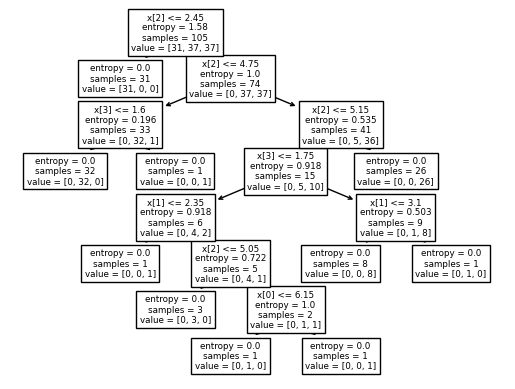

In [11]:
# Visualize the decision tree 
plot_tree(tree_clf)

In [12]:
# Define the hyperparameters to search over 
param_grid = {"max_depth": [1, 2, 3, 4, 5, 6, 7]} 
# Create a grid search object 
grid_search = GridSearchCV(tree_clf, param_grid, cv=5) 
# Fit the grid search object to the training data 
grid_search.fit(X_train, y_train) 
# Print the best hyperparameters found by the grid search 
print("Best hyperparameters:", grid_search.best_params_)

Best hyperparameters: {'max_depth': 3}


In [13]:
# Create a new decision tree classifier object with the best hyperparameters 
tree_clf_tuned = DecisionTreeClassifier(criterion='entropy', max_depth=2, random_state=42) 
# Fit the classifier to the training data 
tree_clf_tuned.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=2, random_state=42)

[Text(0.4, 0.8333333333333334, 'x[2] <= 2.45\nentropy = 1.58\nsamples = 105\nvalue = [31, 37, 37]'),
 Text(0.2, 0.5, 'entropy = 0.0\nsamples = 31\nvalue = [31, 0, 0]'),
 Text(0.6, 0.5, 'x[2] <= 4.75\nentropy = 1.0\nsamples = 74\nvalue = [0, 37, 37]'),
 Text(0.4, 0.16666666666666666, 'entropy = 0.196\nsamples = 33\nvalue = [0, 32, 1]'),
 Text(0.8, 0.16666666666666666, 'entropy = 0.535\nsamples = 41\nvalue = [0, 5, 36]')]

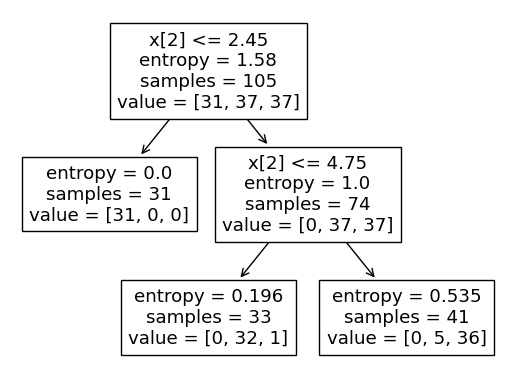

In [14]:
# Visualize the decision tree 
plot_tree(tree_clf_tuned)

In [15]:
df_clean_iris_set = X.copy()
df_clean_iris_set['iris_name']=y
df_clean_iris_set.head()


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),iris_name
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


<Axes: title={'center': 'Pearson Correlation of Features'}>

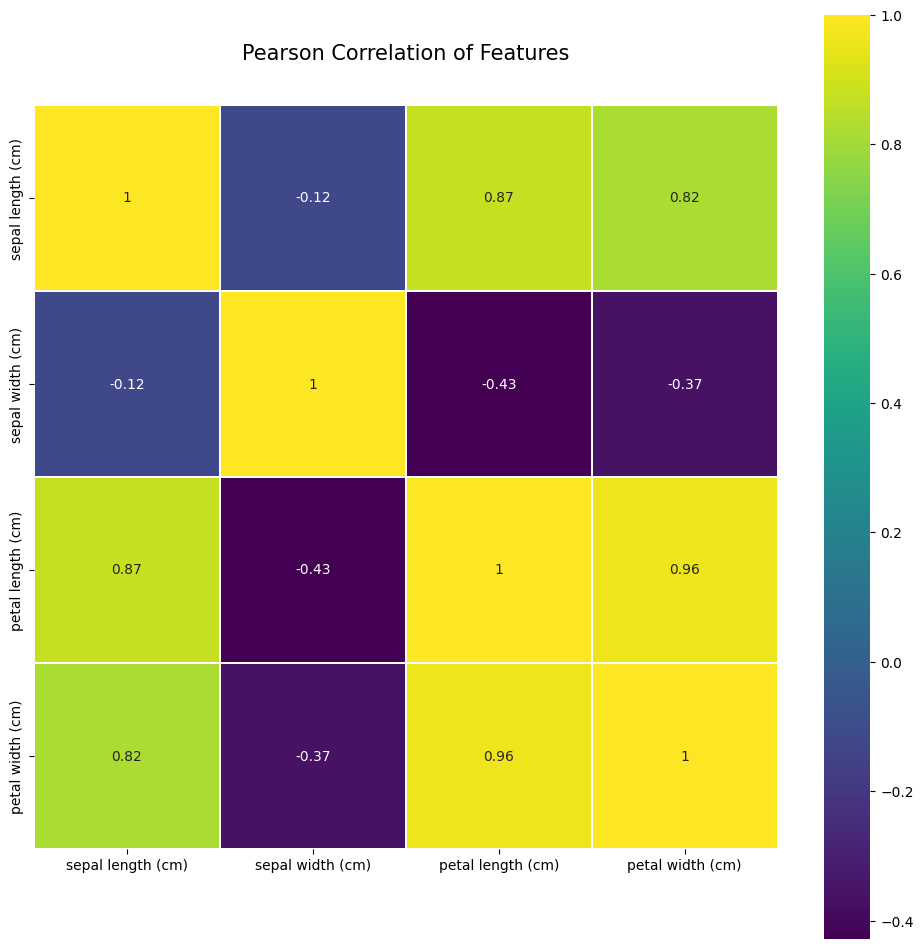

In [16]:
# drop iris_name column
df_clean_iris_set.drop(columns=['iris_name'], inplace=True)

import seaborn as sns
colormap = plt.cm.viridis
plt.figure(figsize=(12,12))
plt.title('Pearson Correlation of Features', y=1.05, size=15)
sns.heatmap(df_clean_iris_set.astype(float).corr(),linewidths=0.1,vmax=1.0, square=True, cmap=colormap, linecolor='white', annot=True)

In [17]:
### Exercises
### 7. Drop the *petal width* column from the database and create a decision tree in a similar way with the example.
### 8. Find the proper depth and evaluate the score for the decision tree model that you build.

df_clean_iris_set.drop(columns=['petal width (cm)'], inplace=True)

Accuracy: 0.98
Best hyperparameters: {'max_depth': 3}


[Text(0.4, 0.8333333333333334, 'x[2] <= 2.45\nentropy = 1.58\nsamples = 105\nvalue = [31, 37, 37]'),
 Text(0.2, 0.5, 'entropy = 0.0\nsamples = 31\nvalue = [31, 0, 0]'),
 Text(0.6, 0.5, 'x[2] <= 4.75\nentropy = 1.0\nsamples = 74\nvalue = [0, 37, 37]'),
 Text(0.4, 0.16666666666666666, 'entropy = 0.196\nsamples = 33\nvalue = [0, 32, 1]'),
 Text(0.8, 0.16666666666666666, 'entropy = 0.535\nsamples = 41\nvalue = [0, 5, 36]')]

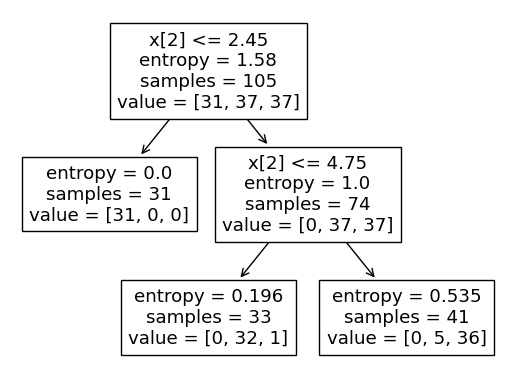

In [18]:
y_pred = tree_clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred) 
print("Accuracy: {:.2f}".format(accuracy))

param_grid = {"max_depth": [1, 2, 3, 4, 5, 6, 7]}
grid_search = GridSearchCV(tree_clf, param_grid, cv=5)
grid_search.fit(X_train, y_train) 
print("Best hyperparameters:", grid_search.best_params_)

tree_clf_tuned = DecisionTreeClassifier(criterion='entropy', max_depth=2, random_state=42) 
tree_clf_tuned.fit(X_train, y_train)

plot_tree(tree_clf_tuned)